In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

BELOW IS THE WIN RATES, AND AFFECT OF THEM DEPENDING ON THE SITUATION, HOME OR AWAY

In [278]:
df = pd.read_csv('./data/processed/games.csv')
p = df[ df['result'] == 'Win' ]['home_or_away'].value_counts(normalize=True)['HOME']
q = df[ df['result'] == 'Win' ]['home_or_away'].value_counts(normalize=True)['AWAY']

print(f'percentage of home win: {p}')
print(f'percentage of away win: {q}')

percentage of home win: 0.547228525121556
percentage of away win: 0.4527714748784441


CORELATION BETWEEN: shotsOnGoalFor and goalsFor

Coefficient of correlation: 0.147
Coefficient of determination (R-squared): 0.022


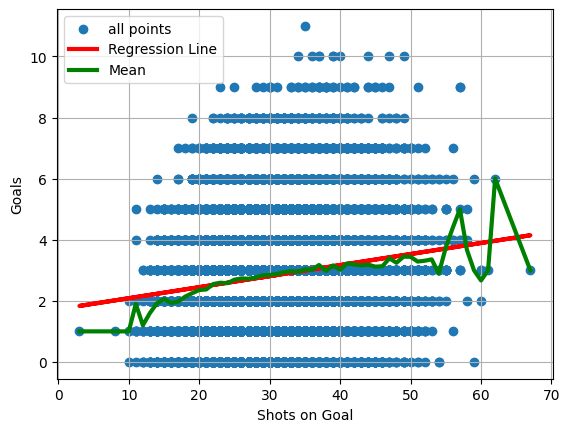

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

df = pd.read_csv('./data/processed/games.csv')
shots_on_goals = df['shotsOnGoalFor']
goals = df['goalsFor']

# Calculate correlation and the p-value
corr, _ = pearsonr(shots_on_goals, goals)
print('Coefficient of correlation: %.3f' % corr)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(shots_on_goals, goals)

# Calculate R-squared
r_squared = r_value**2
print('Coefficient of determination (R-squared): %.3f' % r_squared)

# Compute y-values for the regression line
regression_line_y = slope * shots_on_goals + intercept

# Create scatter plot
plt.scatter(shots_on_goals, goals)

# Plot regression line
plt.plot(shots_on_goals, regression_line_y, color='red', linewidth=3)

# Add labels, title and grid
plt.xlabel('Shots on Goal')
plt.ylabel('Goals')
plt.grid(True)

# Compute the mean of goals for each number of shots on goal
means = df.groupby('shotsOnGoalFor')['goalsFor'].mean()

# Plot the mean of goals for each number of shots on goal
plt.plot(means.index, means, color='green', linewidth=3)

plt.legend(['all points', 'Regression Line', 'Mean'], loc='upper left')
# Show the plot
plt.show()

A DISTRIBUTION OF GAMESCORE(OVER ALL GOODNESS OF A PLAYER) OVER THIER AGE

Text(0, 0.5, 'Game Score')

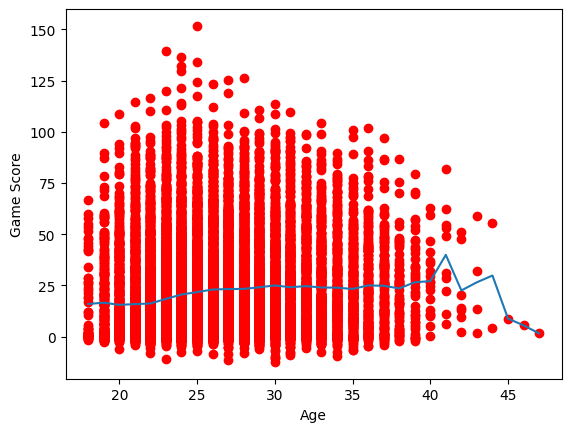

In [202]:
df = pd.read_csv('./data/processed/skaters.csv')

scores = []
ages   = []
for age in range(df['age'].min(), df['age'].max()+1):
    score = df[df['age'] == age]['gameScore']
    scores.append(score.mean())
    ages.append(age)

plt.plot(df['age'], df['gameScore'], 'ro') # all dots
plt.plot(ages, scores) # mean at each year
plt.xlabel('Age')
plt.ylabel('Game Score')

A DISTRIBUTION OF GAMESCORE FOR EACH AGE

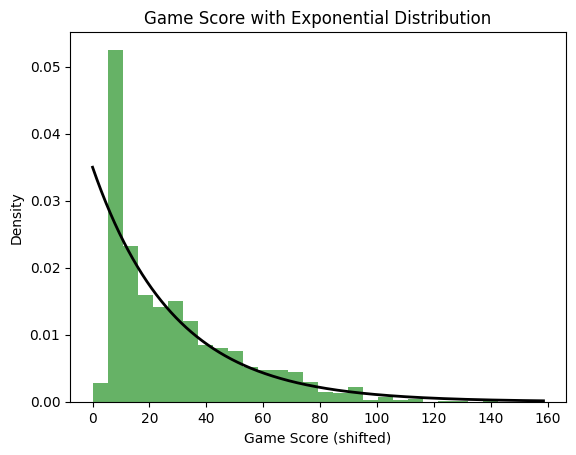

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

AGE = 25

df = pd.read_csv('./data/processed/skaters.csv')

def age_gameScore(age, df):
    players = df[df['age'] == age]
    return players['gameScore']

scores = age_gameScore(AGE, df)

# Shift the scores so they start at 0
scores_shifted = scores - np.min(scores)

# Fit an exponential distribution to the shifted data
params = expon.fit(scores_shifted)

# Plot the histogram of the shifted data
plt.hist(scores_shifted, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF of the fitted Exponential distribution
x = np.linspace(0, np.max(scores_shifted), 10000)
p = expon.pdf(x, *params)
plt.plot(x, p, 'k', linewidth=2)

plt.title("Game Score with Exponential Distribution")
plt.xlabel("Game Score (shifted)")
plt.ylabel("Density")

plt.show()

DISTRIBUTION OF A (GIVEN TEAM'S AT A GIVE GAME AVG gamescore) over (OPPSOING TEAM'S AVG gamescore) i call this coeficient score difference

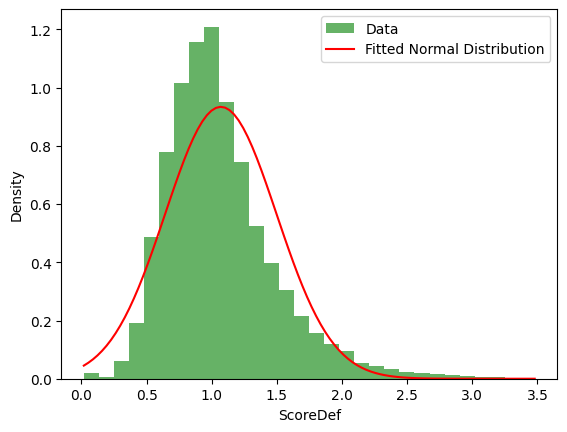

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

games = pd.read_csv('./data/processed/games.csv')

filtered_games = games[(0 < games['scoreDef']) & (games['scoreDef'] < 3.5)]['scoreDef']

x = np.linspace(filtered_games.min(),filtered_games.max(), 100)

# Fit the Normal distribution to the data
mu, sigma = norm.fit(filtered_games)

# Plot the histogram
plt.hist(filtered_games, bins=30, density=True, alpha=0.6, color='g', label='Data')

# Plot the PDF of the fitted Normal distribution
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Fitted Normal Distribution')

# Add labels and a legend
plt.xlabel('ScoreDef')
plt.ylabel('Density')
plt.legend()
plt.show()

DISTRIBUTION OF score difference FOR ALL WON GAMES

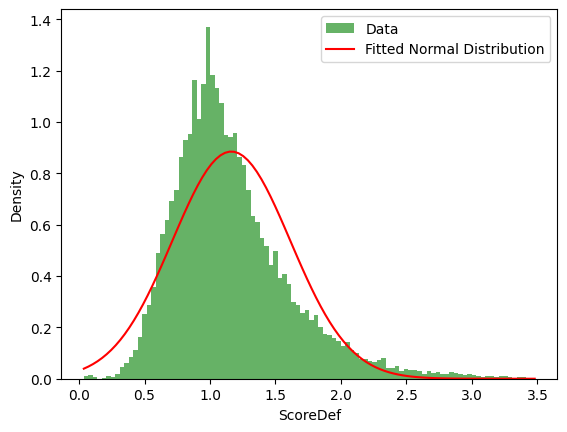

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

games = pd.read_csv('./data/processed/games.csv')

# Filter the dataframe
filtered_games = games[(0 < games['scoreDef']) & (games['scoreDef'] < 3.5) & (games['result'] == 'Win')]['scoreDef']

# Find the center of each bin
x = np.linspace(filtered_games.min(),filtered_games.max(), 100)

# Fit the Normal distribution to the data
mu, sigma = norm.fit(filtered_games)

# Plot the histogram
plt.hist(filtered_games, bins=100, density=True, alpha=0.6, color='g', label='Data')

# Plot the PDF of the fitted Normal distribution
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Fitted Normal Distribution')

# Add labels and a legend
plt.xlabel('ScoreDef')
plt.ylabel('Density')
plt.legend()
plt.show()

A chance of team winning if score difference is know

In [216]:
from scipy.stats import norm

scoreDef = 1.17
mu, sigma = norm.fit(filtered_games) # Assuming that filtered_games is defined

# Calculate the CDF at scoreDef
probability = norm.cdf(scoreDef, mu, sigma)

print(f"probability of winning when scoreDef is {scoreDef}: {probability}")

probability of winning when scoreDef is 1.17: 0.5063661572941162
